# 3. Consolidação de dataframes

## 3.1. Obtenção de dados

In [59]:
import pandas as pd
import yfinance as yf
import numpy as np

In [60]:
ibov_yf = pd.read_excel('dados_concatenar_dfs.xlsx', sheet_name='ibov_yf', index_col='Date', parse_dates=True)
ibov_tv = pd.read_excel('dados_concatenar_dfs.xlsx', sheet_name='ibov_tv', index_col=0, parse_dates=True)
petr4_ohlc = pd.read_excel('dados_concatenar_dfs.xlsx', sheet_name='petr4_ohlc', index_col='Date', parse_dates=True)
petr4_dividendos = pd.read_excel('dados_concatenar_dfs.xlsx', sheet_name='petr4_dividends', index_col=0, parse_dates=True)

In [61]:
ibov_yf.head()

,open,high,low,close,volume
Date,,,,,
2015-01-02,50005,50005,48345,48512,2882100
2015-01-05,48512,48512,47264,47517,3866100
2015-01-06,47517,48061,47338,48001,4559300
2015-01-07,48006,49882,48006,49463,4408800
2015-01-08,49463,50261,49017,49943,3621900


In [62]:
ibov_tv.head()

,symbol,open,high,low,close,volume
Date,,,,,,
2015-01-02,BMFBOVESPA:IBOV,50004.500,50004.500,48345.262,48512.219,0
2015-01-05,BMFBOVESPA:IBOV,48512.219,48512.219,47263.910,47516.820,0
2015-01-06,BMFBOVESPA:IBOV,47517.141,48061.281,47337.711,48000.922,0
2015-01-07,BMFBOVESPA:IBOV,48006.051,49882.262,48006.051,49462.910,0
2015-01-08,BMFBOVESPA:IBOV,49463.148,50260.719,49017.309,49943.301,0


In [63]:
petr4_ohlc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027,35389440000
2000-01-04,5.550,5.550,5.550,5.550,1.768468,28861440000
2000-01-05,5.494,5.494,5.494,5.494,1.750624,43033600000
2000-01-06,5.475,5.475,5.475,5.475,1.744570,34055680000
2000-01-07,5.500,5.500,5.500,5.500,1.752536,20912640000


In [64]:
petr4_dividendos.head()

,Dividends
2005-04-01,0.133288
2005-07-01,0.250663
2006-01-02,0.259000
2006-04-04,0.132700
2006-11-01,0.500750


In [65]:
petr4_dividendos.index

DatetimeIndex(['2005-04-01', '2005-07-01', '2006-01-02', '2006-04-04',
               '2006-11-01', '2007-01-02', '2007-04-03', '2007-08-20',
               '2007-10-08', '2008-01-14', '2008-04-07', '2008-12-29',
               '2009-04-09', '2009-07-06', '2009-10-01', '2009-12-21',
               '2010-04-23', '2010-05-24', '2010-08-02', '2010-11-03',
               '2010-12-22', '2011-03-22', '2011-04-29', '2011-05-12',
               '2011-08-03', '2011-11-14', '2012-01-03', '2012-03-20',
               '2012-05-14', '2013-04-30', '2014-04-03', '2018-05-22',
               '2018-08-14', '2018-11-22', '2018-12-26', '2019-04-26',
               '2019-05-22', '2019-08-13', '2019-11-12', '2019-12-27',
               '2020-04-23', '2020-04-28', '2020-07-23', '2021-04-15',
               '2021-08-17', '2021-12-02', '2022-04-14', '2022-05-24',
               '2022-08-12', '2022-11-22'],
              dtype='datetime64[ns]', freq=None)

In [66]:
ibov_tv.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2023-04-11', '2023-04-12', '2023-04-13', '2023-04-14',
               '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20',
               '2023-04-24', '2023-04-25'],
              dtype='datetime64[ns]', name='Date', length=2059, freq=None)

## 3.2. Comparação se os dataframes são iguais

In [67]:
pd.DataFrame.equals(ibov_yf, ibov_tv)

False

In [68]:
pd.DataFrame.equals(ibov_yf[['open', 'close']] , ibov_tv[['open', 'close']])

False

* Checar o que é falso

In [69]:
set(ibov_yf).symmetric_difference(ibov_tv)

{'symbol'}

Checar o que tem no df1 e não tem no df2 (nesse exemplo baseado no index)

In [70]:
ibov_yf[~ibov_yf.index.isin(ibov_tv.index)]

,open,high,low,close,volume
Date,,,,,
2017-12-29,76077,76437,76077,76402,0


* __!!! O ibov_tv não possui a data "2017-12-29"__

## 3.3. Função merge

In [71]:
petr4_ohlc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027,35389440000
2000-01-04,5.550,5.550,5.550,5.550,1.768468,28861440000
2000-01-05,5.494,5.494,5.494,5.494,1.750624,43033600000
2000-01-06,5.475,5.475,5.475,5.475,1.744570,34055680000
2000-01-07,5.500,5.500,5.500,5.500,1.752536,20912640000


In [72]:
petr4_dividendos.head()

,Dividends
2005-04-01,0.133288
2005-07-01,0.250663
2006-01-02,0.259000
2006-04-04,0.132700
2006-11-01,0.500750


* Fazendo merge da coluna Close 

In [73]:
df_merge_close_div = pd.merge(petr4_ohlc["Close"], petr4_dividendos, how= "right", left_index = True, right_index= True)

In [74]:
# Usando o right, ficamos só com as datas onde houveram os dividendos!!!

df_merge_close_div.head()

,Close,Dividends
2005-04-01,12.98750,0.133288
2005-07-01,13.52375,0.250663
2006-01-02,19.04500,0.259000
2006-04-04,21.64500,0.132700
2006-11-01,21.22500,0.500750


Usar o "outer join" para checar dados presente em apenas um dos dataframes, utilizando o indicator=True

In [75]:
df_merge_yf_tv = pd.merge(ibov_yf["close"], ibov_tv["close"], how = "outer", left_index = True, right_index = True, indicator= True)

In [76]:
df_merge_yf_tv.head()

,close_x,close_y,_merge
Date,,,
2015-01-02,48512.0,48512.219,both
2015-01-05,47517.0,47516.820,both
2015-01-06,48001.0,48000.922,both
2015-01-07,49463.0,49462.910,both
2015-01-08,49943.0,49943.301,both


In [77]:
df_merge_yf_tv[df_merge_yf_tv["_merge"] != 'both']

,close_x,close_y,_merge
Date,,,
2017-12-29,76402.0,NaN,left_only
2018-11-20,NaN,87900.828,right_only
2020-11-20,NaN,106042.480,right_only


In [78]:
ibov_yf['Data'] = ibov_yf.index
ibov_tv['Data'] = ibov_tv.index

In [79]:
ibov_tv.head()

,symbol,open,high,low,close,volume,Data
Date,,,,,,,
2015-01-02,BMFBOVESPA:IBOV,50004.500,50004.500,48345.262,48512.219,0,2015-01-02
2015-01-05,BMFBOVESPA:IBOV,48512.219,48512.219,47263.910,47516.820,0,2015-01-05
2015-01-06,BMFBOVESPA:IBOV,47517.141,48061.281,47337.711,48000.922,0,2015-01-06
2015-01-07,BMFBOVESPA:IBOV,48006.051,49882.262,48006.051,49462.910,0,2015-01-07
2015-01-08,BMFBOVESPA:IBOV,49463.148,50260.719,49017.309,49943.301,0,2015-01-08


In [80]:
df_merge_yf_tv2 = pd.merge(ibov_yf[["Data", "close"]], ibov_tv[["Data", "close"]], how = 'inner', on = "Data", suffixes = ['_yf', '_tv'])

In [81]:
df_merge_yf_tv2.head()

,Data,close_yf,close_tv
0,2015-01-02,48512,48512.219
1,2015-01-05,47517,47516.820
2,2015-01-06,48001,48000.922
3,2015-01-07,49463,49462.910
4,2015-01-08,49943,49943.301


## 3.4. Função Concat

In [82]:
ibov_yf = pd.read_excel('dados_concatenar_dfs.xlsx', sheet_name='ibov_yf', index_col='Date', parse_dates=True)
ibov_tv = pd.read_excel('dados_concatenar_dfs.xlsx', sheet_name='ibov_tv', index_col=0, parse_dates=True)
petr4_ohlc = pd.read_excel('dados_concatenar_dfs.xlsx', sheet_name='petr4_ohlc', index_col='Date', parse_dates=True)
petr4_dividendos = pd.read_excel('dados_concatenar_dfs.xlsx', sheet_name='petr4_dividends', index_col=0, parse_dates=True)

In [83]:
# Empilhando os DataFrames

ibov_concat_abaixo = pd.concat([ibov_yf, ibov_tv], axis = 0)

In [84]:
# Arrumando o index
ibov_concat_abaixo = ibov_concat_abaixo.sort_index()
ibov_concat_abaixo.head()

,open,high,low,close,volume,symbol
Date,,,,,,
2015-01-02,50005.000,50005.000,48345.000,48512.000,2882100,NaN
2015-01-02,50004.500,50004.500,48345.262,48512.219,0,BMFBOVESPA:IBOV
2015-01-05,48512.219,48512.219,47263.910,47516.820,0,BMFBOVESPA:IBOV
2015-01-05,48512.000,48512.000,47264.000,47517.000,3866100,NaN
2015-01-06,47517.141,48061.281,47337.711,48000.922,0,BMFBOVESPA:IBOV


In [85]:
# Ignorando o index e usando outer ou inner

ibov_concat_abaixo = pd.concat([ibov_yf, ibov_tv], axis = 0, ignore_index = True, join = 'outer')

In [86]:
ibov_concat_abaixo.head()

,open,high,low,close,volume,symbol
0,50005.0,50005.0,48345.0,48512.0,2882100,NaN
1,48512.0,48512.0,47264.0,47517.0,3866100,NaN
2,47517.0,48061.0,47338.0,48001.0,4559300,NaN
3,48006.0,49882.0,48006.0,49463.0,4408800,NaN
4,49463.0,50261.0,49017.0,49943.0,3621900,NaN


In [87]:
# Concatenando, mas sem empilhar

pd.concat([ibov_yf, ibov_tv], axis = 1)

,open,high,low,close,volume,symbol,open,high,low,close,volume
Date,,,,,,,,,,,
2015-01-02,50005.0,50005.0,48345.0,48512.0,2882100.0,BMFBOVESPA:IBOV,50004.500,50004.500,48345.262,48512.219,0.0
2015-01-05,48512.0,48512.0,47264.0,47517.0,3866100.0,BMFBOVESPA:IBOV,48512.219,48512.219,47263.910,47516.820,0.0
2015-01-06,47517.0,48061.0,47338.0,48001.0,4559300.0,BMFBOVESPA:IBOV,47517.141,48061.281,47337.711,48000.922,0.0
2015-01-07,48006.0,49882.0,48006.0,49463.0,4408800.0,BMFBOVESPA:IBOV,48006.051,49882.262,48006.051,49462.910,0.0
2015-01-08,49463.0,50261.0,49017.0,49943.0,3621900.0,BMFBOVESPA:IBOV,49463.148,50260.719,49017.309,49943.301,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-18,106023.0,106475.0,105122.0,106163.0,11207900.0,BMFBOVESPA:IBOV,106022.520,106474.750,105121.740,106163.230,0.0
2023-04-19,106149.0,106149.0,103604.0,103913.0,12713600.0,BMFBOVESPA:IBOV,106148.970,106148.970,103603.700,103912.940,0.0
2023-04-20,103913.0,104615.0,103087.0,104367.0,12378000.0,BMFBOVESPA:IBOV,103913.470,104615.180,103086.980,104366.820,0.0


## 3.5. Operação de Binning

In [88]:
ibov_yf['resultado'] = ibov_yf['close'].pct_change()*100

In [89]:
ibov_yf = ibov_yf.dropna()

In [90]:
ibov_yf.head()

,open,high,low,close,volume,resultado
Date,,,,,,
2015-01-05,48512,48512,47264,47517,3866100,-2.051039
2015-01-06,47517,48061,47338,48001,4559300,1.018583
2015-01-07,48006,49882,48006,49463,4408800,3.045770
2015-01-08,49463,50261,49017,49943,3621900,0.970422
2015-01-09,49955,49955,48501,48840,2999200,-2.208518


* Relembrando esse conceito


In [91]:
results_binning = np.sign(ibov_yf['resultado']).value_counts()

In [92]:
# Exibindo dias negativos, positivos e neutros
results_binning

resultado
 1.0    1071
-1.0     985
 0.0       1
Name: count, dtype: int64

* Voltando ao IBOV

In [93]:
np.where(ibov_yf['resultado'] > 0, 'positivo', 'negativo')

array(['negativo', 'positivo', 'positivo', ..., 'positivo', 'negativo',
       'negativo'], dtype='<U8')

In [94]:
# Criando coluna
ibov_yf['result_binario'] = np.where(ibov_yf['resultado'] > 0, 'positivo', 'negativo')

In [95]:
ibov_yf

,open,high,low,close,volume,resultado,result_binario
Date,,,,,,,
2015-01-05,48512,48512,47264,47517,3866100,-2.051039,negativo
2015-01-06,47517,48061,47338,48001,4559300,1.018583,positivo
2015-01-07,48006,49882,48006,49463,4408800,3.045770,positivo
2015-01-08,49463,50261,49017,49943,3621900,0.970422,positivo
2015-01-09,49955,49955,48501,48840,2999200,-2.208518,negativo
...,...,...,...,...,...,...,...
2023-04-18,106023,106475,105122,106163,11207900,0.138658,positivo
2023-04-19,106149,106149,103604,103913,12713600,-2.119382,negativo
2023-04-20,103913,104615,103087,104367,12378000,0.436904,positivo


* Mesma forma, porém mais clausulas 

In [96]:
ibov_yf['resultado_tres'] = np.where(ibov_yf['resultado'] > 1, 'maior_que_1%',(np.where(ibov_yf['resultado'] >= 0, 
                                                                                        'zero_a_1%', 'negativo')))

In [97]:
ibov_yf.head()

,open,high,low,close,volume,resultado,result_binario,resultado_tres
Date,,,,,,,,
2015-01-05,48512,48512,47264,47517,3866100,-2.051039,negativo,negativo
2015-01-06,47517,48061,47338,48001,4559300,1.018583,positivo,maior_que_1%
2015-01-07,48006,49882,48006,49463,4408800,3.045770,positivo,maior_que_1%
2015-01-08,49463,50261,49017,49943,3621900,0.970422,positivo,zero_a_1%
2015-01-09,49955,49955,48501,48840,2999200,-2.208518,negativo,negativo


## 3.6. Crosstab

In [98]:
ibov_yf['dia_semana'] = ibov_yf.index.strftime('%A')

In [99]:
ibov_yf.head()

,open,high,low,close,volume,resultado,result_binario,resultado_tres,dia_semana
Date,,,,,,,,,
2015-01-05,48512,48512,47264,47517,3866100,-2.051039,negativo,negativo,Monday
2015-01-06,47517,48061,47338,48001,4559300,1.018583,positivo,maior_que_1%,Tuesday
2015-01-07,48006,49882,48006,49463,4408800,3.045770,positivo,maior_que_1%,Wednesday
2015-01-08,49463,50261,49017,49943,3621900,0.970422,positivo,zero_a_1%,Thursday
2015-01-09,49955,49955,48501,48840,2999200,-2.208518,negativo,negativo,Friday


In [100]:
crosstab_dias_semana = pd.crosstab(ibov_yf['dia_semana'], ibov_yf['resultado_tres'])

In [101]:
crosstab_dias_semana['Total_dias'] = crosstab_dias_semana.sum(axis=1)

In [102]:
crosstab_dias_semana.loc['Total_valores'] = crosstab_dias_semana.sum(axis=0)

In [103]:
crosstab_dias_semana

resultado_tres,maior_que_1%,negativo,zero_a_1%,Total_dias
dia_semana,,,,
Friday,84,201,119,404
Monday,86,206,117,409
Thursday,91,198,124,413
Tuesday,103,191,117,411
Wednesday,120,189,111,420
Total_valores,484,985,588,2057


In [104]:
crosstab_dias_semana['Neg_%'] = crosstab_dias_semana['negativo'] / crosstab_dias_semana['Total_dias'] * 100

In [105]:
crosstab_dias_semana

resultado_tres,maior_que_1%,negativo,zero_a_1%,Total_dias,Neg_%
dia_semana,,,,,
Friday,84,201,119,404,49.752475
Monday,86,206,117,409,50.366748
Thursday,91,198,124,413,47.941889
Tuesday,103,191,117,411,46.472019
Wednesday,120,189,111,420,45.000000
Total_valores,484,985,588,2057,47.885270


## 3.7. Pivot Table

* Criar tabelas dinâmicas como no Excel

In [106]:
ibov_yf.head()

,open,high,low,close,volume,resultado,result_binario,resultado_tres,dia_semana
Date,,,,,,,,,
2015-01-05,48512,48512,47264,47517,3866100,-2.051039,negativo,negativo,Monday
2015-01-06,47517,48061,47338,48001,4559300,1.018583,positivo,maior_que_1%,Tuesday
2015-01-07,48006,49882,48006,49463,4408800,3.045770,positivo,maior_que_1%,Wednesday
2015-01-08,49463,50261,49017,49943,3621900,0.970422,positivo,zero_a_1%,Thursday
2015-01-09,49955,49955,48501,48840,2999200,-2.208518,negativo,negativo,Friday


In [107]:
pivot_table_semana = pd.pivot_table(ibov_yf, index= 'dia_semana', values= 'resultado', aggfunc= ['mean'])
pivot_table_semana

,mean
,resultado
dia_semana,
Friday,-0.046833
Monday,-0.075541
Thursday,0.012609
Tuesday,0.218894
Wednesday,0.135779


In [108]:
# Ordenando
pivot_table_semana.sort_values(('mean','resultado'), ascending = True)

,mean
,resultado
dia_semana,
Monday,-0.075541
Friday,-0.046833
Thursday,0.012609
Wednesday,0.135779
Tuesday,0.218894


Criando uma nova pivot table, desta vez com várias metricas descritivas

In [109]:
semana = pd.pivot_table(ibov_yf, index= 'dia_semana', values= 'resultado', aggfunc= ['mean', 'median', 'std', 'max', 'min'])
semana

,mean,median,std,max,min
,resultado,resultado,resultado,resultado,resultado
dia_semana,,,,,
Friday,-0.046833,0.011759,1.576639,13.908215,-5.508944
Monday,-0.075541,-0.010306,1.750983,6.521614,-13.921479
Thursday,0.012609,0.035252,1.630764,6.597157,-14.779679
Tuesday,0.218894,0.109372,1.501336,9.688532,-4.865664
Wednesday,0.135779,0.132779,1.565976,7.496164,-10.348848


Agora gerar uma tabela dinâmica num esquema de matriz (index x colunas)

In [110]:
pd.pivot_table(ibov_yf, index = 'dia_semana', columns = 'resultado_tres',values = 'resultado', aggfunc = ['mean'])

mean                    
resultado_tres maior_que_1%  negativo zero_a_1%
dia_semana                                     
Friday             1.906963 -1.173818  0.477579
Monday             1.974979 -1.245742  0.477592
Thursday           1.900237 -1.152544  0.487819
Tuesday            2.092698 -0.931680  0.447592
Wednesday          1.824719 -1.126339  0.458909

# 3.8. Group By

In [111]:
# Criando colunas extras
ibov_yf['Ano'] = ibov_yf.index.year
ibov_yf['Mes'] = ibov_yf.index.month_name()
ibov_yf['Mes_numerico'] = ibov_yf.index.month

ibov_yf.head()

,open,high,low,close,volume,resultado,result_binario,resultado_tres,dia_semana,Ano,Mes,Mes_numerico
Date,,,,,,,,,,,,
2015-01-05,48512,48512,47264,47517,3866100,-2.051039,negativo,negativo,Monday,2015,January,1
2015-01-06,47517,48061,47338,48001,4559300,1.018583,positivo,maior_que_1%,Tuesday,2015,January,1
2015-01-07,48006,49882,48006,49463,4408800,3.045770,positivo,maior_que_1%,Wednesday,2015,January,1
2015-01-08,49463,50261,49017,49943,3621900,0.970422,positivo,zero_a_1%,Thursday,2015,January,1
2015-01-09,49955,49955,48501,48840,2999200,-2.208518,negativo,negativo,Friday,2015,January,1


In [112]:
ibov_yf.groupby(['Mes_numerico']).mean(numeric_only= True)

,open,high,low,close,volume,resultado,Ano
Mes_numerico,,,,,,,
1,87314.279570,88127.741935,86579.629032,87437.919355,6.600006e+06,0.133165,2019.059140
2,87936.500000,88727.849398,87044.602410,87840.680723,6.794858e+06,-0.014060,2019.000000
3,84382.756345,85436.010152,83165.492386,84305.258883,7.484540e+06,-0.031309,2019.025381
4,84762.206897,85631.890805,83966.505747,84819.017241,6.491016e+06,0.136810,2018.885057
5,82792.875740,83550.183432,81966.159763,82765.254438,6.484682e+06,-0.074255,2018.526627
6,82684.293413,83420.287425,81893.077844,82677.353293,6.353080e+06,0.021947,2018.479042
7,84720.953488,85426.529070,84107.720930,84851.110465,5.508829e+06,0.173659,2018.500000
8,85600.275281,86356.011236,84787.134831,85588.713483,6.283104e+06,-0.016564,2018.505618
9,85537.006061,86311.654545,84742.412121,85519.757576,6.492956e+06,-0.004134,2018.515152


In [113]:
ibov_yf[['resultado', 'Mes_numerico']].groupby(['Mes_numerico']).mean(numeric_only = True)

,resultado
Mes_numerico,
1,0.133165
2,-0.014060
3,-0.031309
4,0.136810
5,-0.074255
6,0.021947
7,0.173659
8,-0.016564
9,-0.004134


In [114]:
ibov_yf[['resultado', 'Mes_numerico', 'Mes']].groupby(['Mes_numerico', 'Mes']).mean().sort_values(by = 'resultado')

,,resultado
Mes_numerico,Mes,
5,May,-0.074255
3,March,-0.031309
8,August,-0.016564
2,February,-0.014060
9,September,-0.004134
6,June,0.021947
11,November,0.036722
12,December,0.095036
1,January,0.133165


In [119]:
ibov_yf[['resultado', 'Mes_numerico', 'Mes','Ano']].groupby(['Ano', 'Mes_numerico', 'Mes']).mean().head(20)

resultado
Ano  Mes_numerico Mes                 
2015 1            January    -0.155276
     2            February    0.536468
     3            March      -0.027881
     4            April       0.481072
     5            May        -0.311162
     6            June        0.035217
     7            July       -0.187215
     8            August     -0.399678
     9            September  -0.150546
     10           October     0.097292
     11           November   -0.071300
     12           December   -0.187445
2016 1            January    -0.353244
     2            February    0.324988
     3            March       0.743236
     4            April       0.389955
     5            May        -0.495919
     6            June        0.291739
     7            July        0.510937
     8            August      0.050267

In [121]:
ibov_yf[['volume', 'Ano']].groupby(['Ano']).sum()

,volume
Ano,
2015,855703600
2016,957854100
2017,771070800
2018,939901700
2019,1165068800
2020,2360088800
2021,2420400900
2022,3225344100
2023,996169600


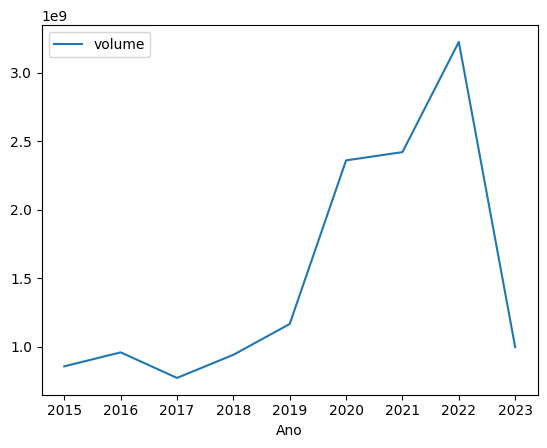

In [122]:
ibov_yf[['volume','Ano']].groupby(['Ano']).sum().plot();

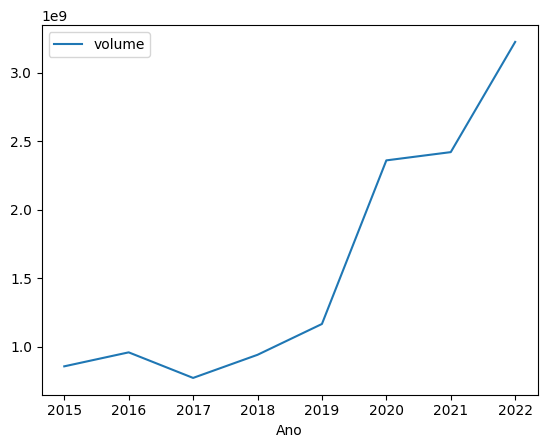

In [124]:
# Sem 2023

ibov_yf[ibov_yf.Ano != 2023][['volume','Ano']].groupby(['Ano']).sum().plot();

In [125]:
ibov_yf_ano = ibov_yf.groupby('Ano')['resultado']

In [127]:
ibov_yf_ano.get_group(2023)

Date
2023-01-02   -3.321791
2023-01-03   -2.077536
2023-01-04    1.121287
2023-01-05    2.073405
2023-01-06    1.225841
                ...   
2023-04-18    0.138658
2023-04-19   -2.119382
2023-04-20    0.436904
2023-04-24   -0.402426
2023-04-25   -0.699395
Name: resultado, Length: 78, dtype: float64

Vamos calcular o coeficiente de variação (desvio / média, expresso em valor absoluto e %)

In [142]:
def coef_variacao(x):
  y = abs((x.std(numeric_only = True)/x.mean(numeric_only = True))*100)
  return y

In [143]:
ibov_yf.groupby(['result_binario']).apply(coef_variacao)

,open,high,low,close,volume,resultado,Ano,Mes_numerico
result_binario,,,,,,,,
negativo,29.366511,29.339696,29.473437,29.441465,63.762653,109.513104,0.121994,54.378805
positivo,28.886377,28.735283,28.901932,28.778012,63.498300,93.430629,0.116724,54.029014


In [144]:
ibov_yf[ibov_yf.result_binario =='positivo']['volume']

Date
2015-01-06     4559300
2015-01-07     4408800
2015-01-08     3621900
2015-01-15     4463600
2015-01-16     3344900
                ...   
2023-04-10     8148700
2023-04-11    18725700
2023-04-12    17345500
2023-04-18    11207900
2023-04-20    12378000
Name: volume, Length: 1071, dtype: int64

In [145]:
from scipy import stats

In [146]:
stats.normaltest(ibov_yf[ibov_yf.result_binario =='positivo']['volume']).pvalue

7.482887267751796e-28

In [147]:
stats.normaltest(ibov_yf[ibov_yf.result_binario =='negativo']['volume']).pvalue

7.784569709076769e-30

Basicamente agrupar os dados de retornos por mes e aplicar a função do teste de normalidade, retornando apenas o p valor

Imagine se tivesse vários grupos o quanto pode salvar tempo

In [156]:
ibov_yf[['volume','result_binario']].groupby('result_binario').agg(lambda x: stats.normaltest(x).pvalue)

,volume
result_binario,
negativo,7.784570e-30
positivo,7.482887e-28


## Extra

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
petro = yf.download('PETR4.SA', start= '2017-01-01')

[*********************100%%**********************]  1 of 1 completed


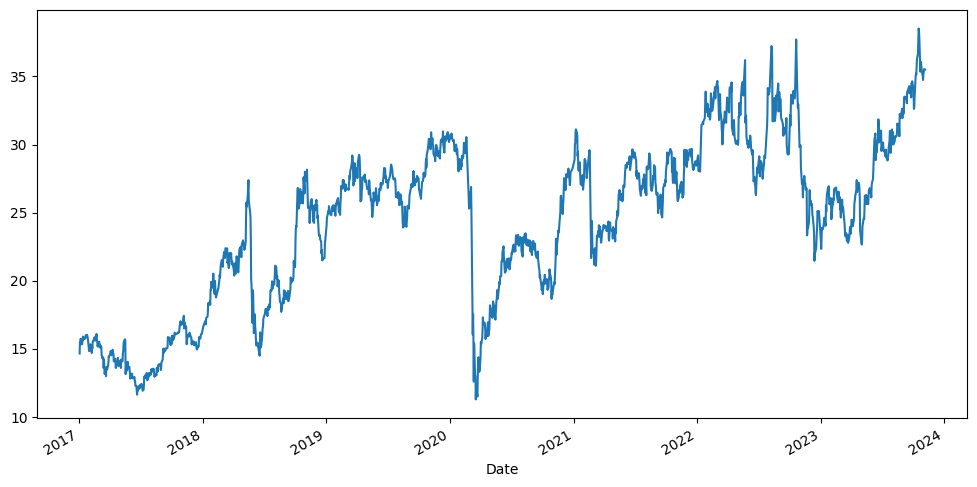

In [3]:
petro.Close.plot(figsize=(12,6));

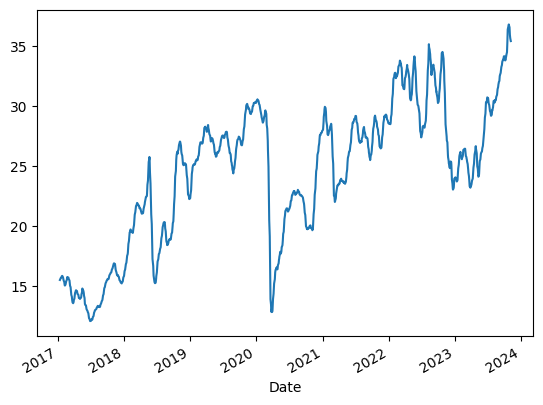

In [4]:
petro.Close.rolling(10).mean().plot();

In [5]:
retornos = petro['Adj Close'].pct_change()

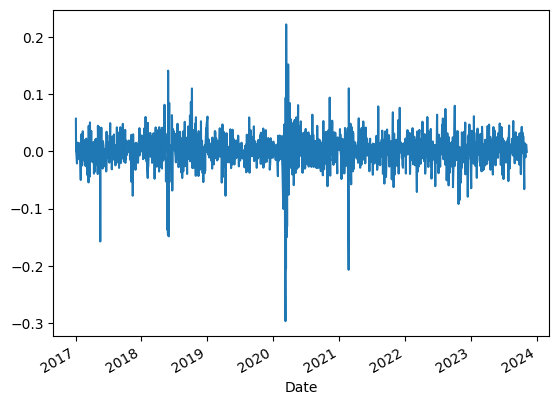

In [6]:
retornos.plot();

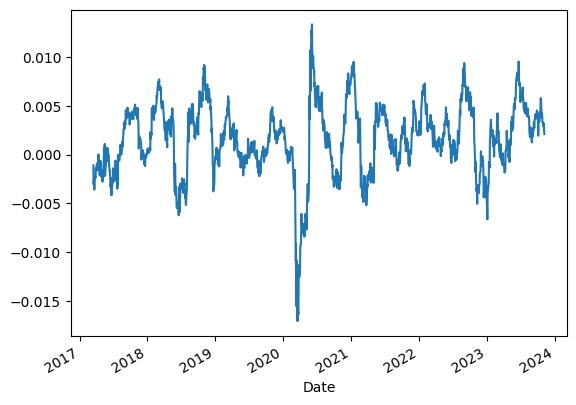

In [7]:
retornos.rolling(50).mean().plot();

In [8]:
retornos.describe()

count    1704.000000
mean        0.001545
std         0.028484
min        -0.296978
25%        -0.011917
50%         0.001383
75%         0.015335
max         0.222222
Name: Adj Close, dtype: float64

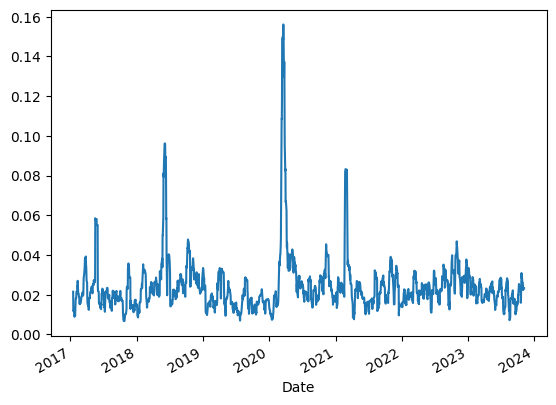

In [10]:
janelas_vol = retornos.rolling(10).std()
janelas_vol.plot();

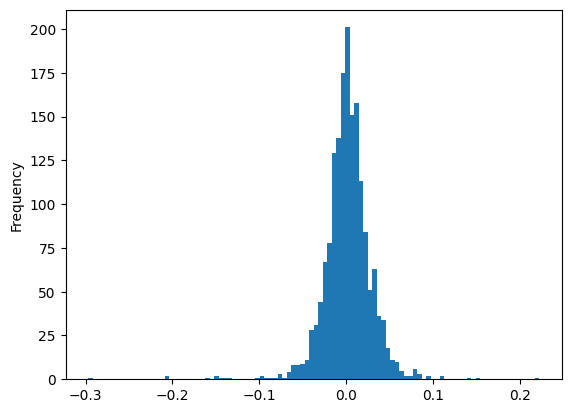

In [11]:
retornos.plot.hist(bins = 100);

* Retorno Acumulado

In [12]:
ret_acum = (retornos + 1).cumprod()

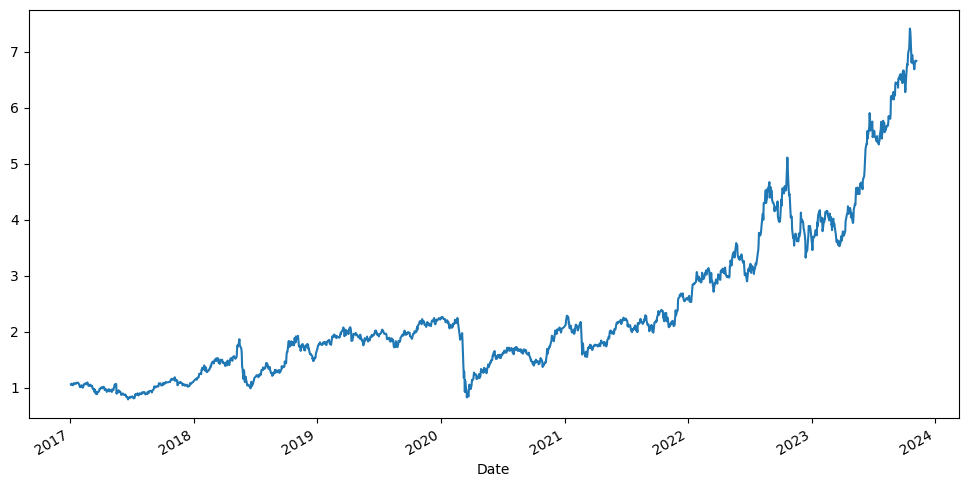

In [13]:
ret_acum.plot(figsize = (12,6));

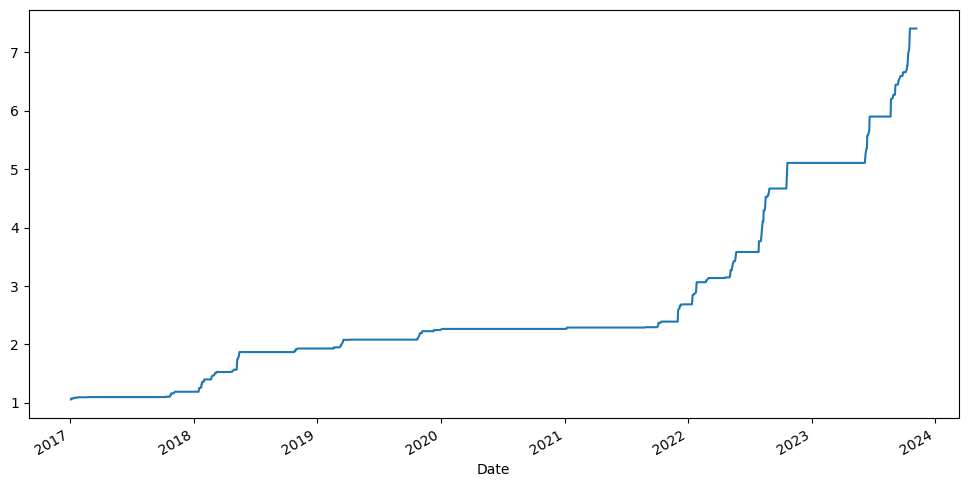

In [14]:
picos = ret_acum.cummax()
picos.plot(figsize = (12,6));

In [16]:
import pandas as pd
retornos = pd.DataFrame(retornos)

In [17]:
retornos.head()

,Adj Close
Date,
2017-01-02,NaN
2017-01-03,0.057299
2017-01-04,0.000000
2017-01-05,0.016129
2017-01-06,-0.005714


In [18]:
retornos['Retorno Acumulado'] = ret_acum
retornos['Picos'] = picos

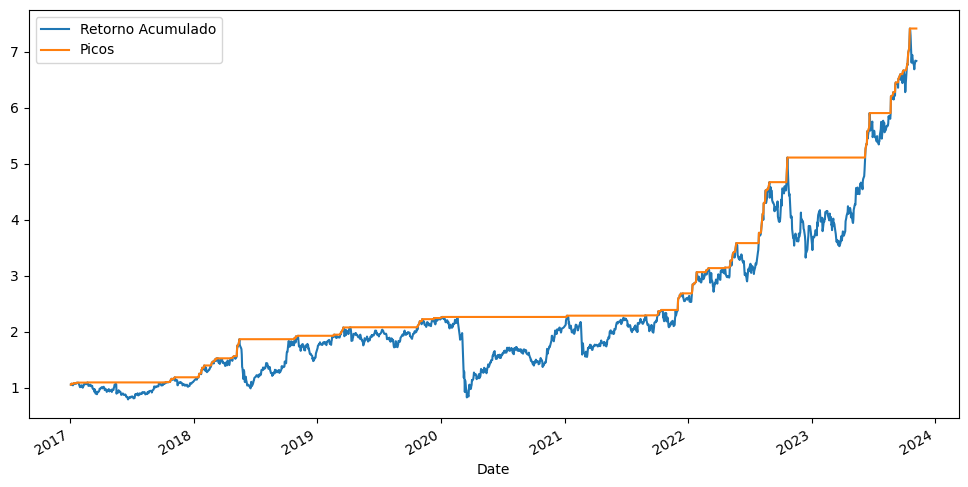

In [19]:
retornos[['Retorno Acumulado', 'Picos']].plot(figsize = (12,6));

In [27]:
drawdown = (ret_acum - picos)/picos

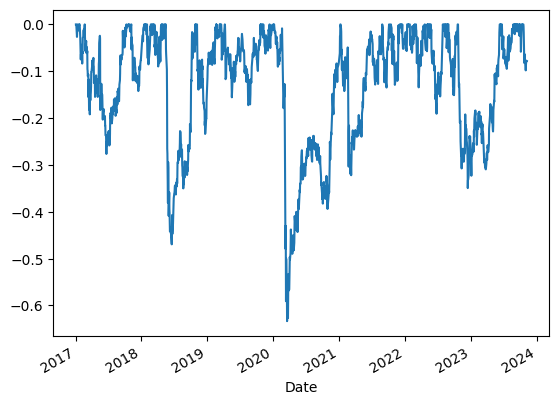

In [29]:
drawdown.plot();

In [30]:
drawdown.min()

-0.6335606134051179